# Exploratory Data Analysis

In [104]:
import os
os.chdir("/Users/eklavya/projects/education/formalEducation/DataScience/DataScienceAssignments/HealthCare/Capstone/submission/")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_context('paper')

In [105]:
# Converts the datatype of a specific column and returns the new dataframe
def func_numeric(df, col_name):
    df[col_name] = df[col_name].astype(float)
    return df

In [106]:
# General Hospital Ratings
cleaned_hospital_ratings = pd.read_csv("cleaned_hospital_ratings_data.csv")

# Group-1 Readmission
cleaned_readmission = pd.read_csv("cleaned_readmission_data.csv")
read_master = pd.read_csv("read_master_data.csv")

# Group-2 Mortality
cleaned_mortality = pd.read_csv("cleaned_mortality_data.csv")
mort_master = pd.read_csv("mort_master_data.csv")

# Group-3 Safety
cleaned_safety = pd.read_csv("cleaned_safety_data.csv")
safe_master = pd.read_csv("safe_master_data.csv")

# Group-4 Experience
cleaned_experience = pd.read_csv("cleaned_experience_data.csv")
expe_master = pd.read_csv("expe_master_data.csv")

# Group-5 Medical
cleaned_medical = pd.read_csv("cleaned_medical_data.csv")
medi_master = pd.read_csv("medi_master_data.csv")

# Group-6 Timeliness
cleaned_timeliness = pd.read_csv("cleaned_timeliness_data.csv")
time_master = pd.read_csv("time_master_data.csv")

# Group-7 Effectiveness
cleaned_effectiveness = pd.read_csv("cleaned_effectiveness_data.csv")
effe_master = pd.read_csv("effe_master_data.csv")

# Cleaned master dataset
cleaned_master = pd.read_csv("cleaned_master_data.csv")

In [107]:
cleaned_hospital_ratings['Hospital Type'].value_counts()

Acute Care Hospitals         3382
Critical Access Hospitals    1337
Childrens                      99
Name: Hospital Type, dtype: int64

In [108]:
hospital_ratings =  cleaned_hospital_ratings[cleaned_hospital_ratings['Hospital Type'] == 'Acute Care Hospitals']

hospital_ratings['Hospital Type'], factors_hospital_type =  pd.factorize(hospital_ratings['Hospital Type'])

hospital_ratings.head()



,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,0,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,0,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,0,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,Proprietary,...,Same as the National average,NaN,NaN,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...


In [109]:
hospital_ratings['Hospital overall rating'].value_counts()
hospital_ratings = func_numeric(hospital_ratings,'Hospital overall rating').set_index('Provider ID')
hospital_ratings.head()


,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,0,Government - Hospital District or Authority,Yes,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,0,Government - Hospital District or Authority,Yes,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,0,Government - Hospital District or Authority,Yes,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,Voluntary non-profit - Private,Yes,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...
10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,Proprietary,Yes,...,Same as the National average,NaN,NaN,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...


In [110]:
# Let's check the Ownership type for the hospitals.

hospital_ratings['Hospital Ownership'].value_counts()

# We see the Private hospitals have the data regarding the ratings in the dataset.


Voluntary non-profit - Private                 1383
Proprietary                                     723
Voluntary non-profit - Other                    369
Voluntary non-profit - Church                   284
Government - Hospital District or Authority     281
Government - Local                              183
Physician                                        63
Government - State                               54
Government - Federal                             38
Tribal                                            4
Name: Hospital Ownership, dtype: int64

In [111]:
# Let us remove the NA's values-


hospital_ratings = hospital_ratings[hospital_ratings['Hospital overall rating'].notnull()]
hospital_ratings.head()



,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,Emergency Services,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,0,Government - Hospital District or Authority,Yes,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,0,Government - Hospital District or Authority,Yes,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,0,Government - Hospital District or Authority,Yes,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,0,Voluntary non-profit - Private,Yes,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...
10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,0,Proprietary,Yes,...,Same as the National average,NaN,NaN,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,NaN,Results are not available for this reporting p...


## Univariate analysis - segmented


In [112]:
hospital_ratings.groupby(['State', 'Hospital overall rating']).agg({'State': np.count_nonzero})

State
State Hospital overall rating       
AK    2.0                          1
      3.0                          7
AL    2.0                         15
      3.0                         48
      4.0                         12
...                              ...
WV    3.0                         15
      4.0                          2
WY    2.0                          2
      3.0                          5
      4.0                          3

[205 rows x 1 columns]

In [113]:
hospital_ratings.groupby(['State'])['Hospital overall rating'].agg({'Hospital overall rating': np.mean }).sort_values(by=['Hospital overall rating'], ascending= False)

,Hospital overall rating
State,
SD,4.200000
WI,3.692308
DE,3.666667
ID,3.666667
IN,3.587500
MT,3.583333
NH,3.538462
KS,3.522727
MN,3.520833


In [114]:
hospital_ratings.groupby(['State']).size().sort_values(ascending=False)

State
CA    283
TX    263
FL    164
NY    147
PA    142
IL    124
OH    119
GA     98
TN     88
MI     87
NC     81
IN     80
AL     78
LA     78
OK     77
VA     73
MO     72
WI     65
KY     64
NJ     64
MA     54
MS     54
AZ     53
SC     52
MN     48
WA     48
KS     44
CO     44
AR     43
IA     34
OR     34
UT     29
WV     28
CT     28
NM     26
NE     23
NV     20
ME     17
SD     15
PR     14
NH     13
HI     12
ID     12
MT     12
RI     11
WY     10
AK      8
DC      7
DE      6
ND      6
VT      6
VI      2
GU      1
dtype: int64

In [115]:
avg_by_state = hospital_ratings.groupby(['State'])['Hospital overall rating'].agg({'Hospital overall rating': np.mean })

avg_by_state = avg_by_state.sort_values(by=['Hospital overall rating'], ascending= False).reset_index()
avg_by_state.head()

,State,Hospital overall rating
0,SD,4.200000
1,WI,3.692308
2,DE,3.666667
3,ID,3.666667
4,IN,3.587500


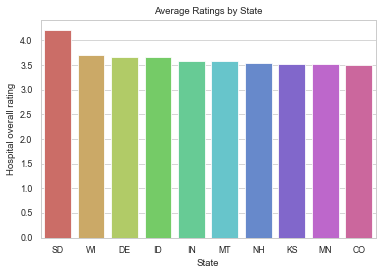

In [116]:
sns.barplot(x= 'State', y= "Hospital overall rating", data = avg_by_state.head(10), palette = 'hls')

plt.title("Average Ratings by State")
plt.show()


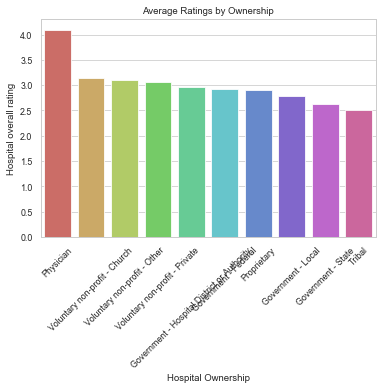

In [118]:

hospital_ratings[["Hospital Ownership", "Hospital overall rating"]]

avg_by_hosp_ownership = hospital_ratings.groupby(["Hospital Ownership"])["Hospital overall rating"].agg({"Hospital overall rating": np.mean })

avg_by_hosp_ownership = avg_by_hosp_ownership.sort_values(by=["Hospital overall rating"], ascending= False).reset_index()

avg_by_hosp_ownership.head(10)

plot = sns.barplot(x = "Hospital Ownership", y= "Hospital overall rating", data = avg_by_hosp_ownership.head(10), palette = 'hls')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.title("Average Ratings by Ownership")
plt.show()